In [1]:
import os
import tensorflow as tf
from ModelBuilderModule import ModelBuilderModule

In [2]:
DATA_PATH = r'~\GTZAN Dataset - Music Genre Classification\Data'
AUDIO_PATH = os.path.join(DATA_PATH,'genres_original')
JSON_PATH = 'mfcc_data.json'

In [3]:
data = ModelBuilderModule.prepare_data(AUDIO_PATH, duration = 30)

In [4]:
#data = ModelBuilderModule.load_JSON('data.json')

In [5]:
inputs = ModelBuilderModule.split_data(data['mfcc'], data['labels'], val_set = True)

In [6]:
inputs['x_val'].shape

(125, 259, 13, 1)

In [11]:
n_class = len(data['mapping'])
model = ModelBuilderModule.createmodel((259, 13, 1), n_class)

Epoch 1/50
67/75 [=========================>....] - ETA: 0s - loss: 1.8496 - categorical_accuracy: 0.3633
Epoch 1: val_categorical_accuracy improved from -inf to 0.20800, saving model to checkpoints\cp-01-0.21.hdf5
75/75 [==============================] - 1s 11ms/step - loss: 1.8160 - categorical_accuracy: 0.3749 - val_loss: 2.6284 - val_categorical_accuracy: 0.2080
Epoch 2/50
69/75 [==========================>...] - ETA: 0s - loss: 1.1276 - categorical_accuracy: 0.5987
Epoch 2: val_categorical_accuracy improved from 0.20800 to 0.35200, saving model to checkpoints\cp-02-0.35.hdf5
75/75 [==============================] - 1s 7ms/step - loss: 1.1241 - categorical_accuracy: 0.5955 - val_loss: 1.5853 - val_categorical_accuracy: 0.3520
Epoch 3/50
73/75 [============================>.] - ETA: 0s - loss: 0.8445 - categorical_accuracy: 0.6978
Epoch 3: val_categorical_accuracy improved from 0.35200 to 0.50400, saving model to checkpoints\cp-03-0.50.hdf5
75/75 [==============================] - 1

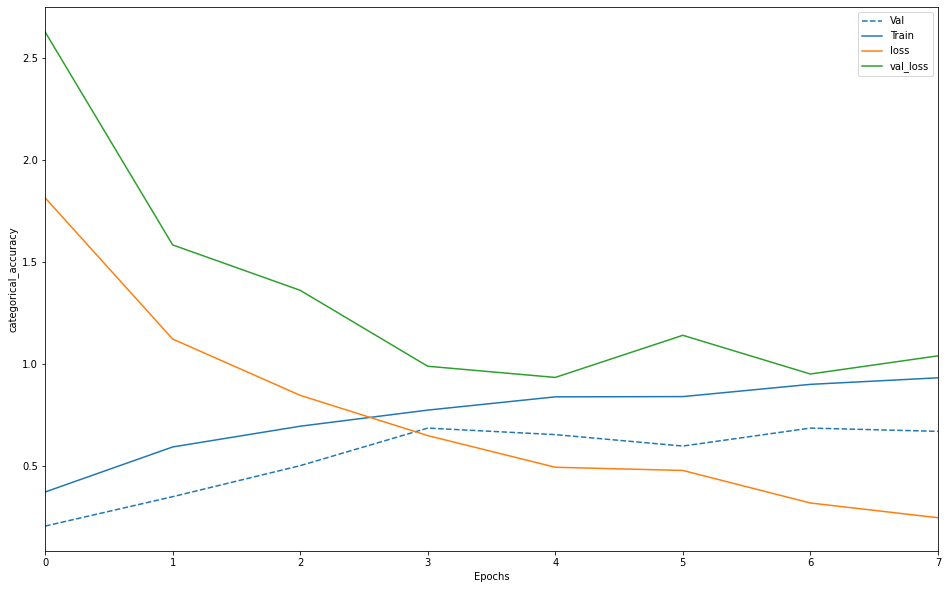

In [12]:
with tf.device('/gpu:0'):
    model = ModelBuilderModule.train(model, inputs['x_train'], inputs['y_train'], 50, val_data = (inputs['x_val'], inputs['y_val']), plot = True)

In [13]:
test_error, accuracy = model.evaluate(inputs['x_test'], inputs['y_test'], verbose=1)

79/79 [==============================] - 0s 3ms/step - loss: 1.3006 - categorical_accuracy: 0.6063
